In [9]:
## Code Header #######
## Notebook Name: Kickstarter Analysis
## Objective: To learn which design decisions help kickstarter campaigns succeed and to predict the successes of any kickstarter campaigns.
## Start Date: 11th April 2020
## Data Sources
    # Source 1: Webscraped kickstarter data - Scraped by Web Robots - https://webrobots.io/kickstarter-datasets/
## Edits to be made
## Questions about the context
    # Does every backer pledge a fixed amount? Or can backers decide the pledge amount?
## Structure of the analysis
    # Data Input: Read all the columns in the right format
    # Run analysis for a single file first, but replicate for all files together.( Is there a way to batch execute)
    # Feature Engineering
        # Blurb : Brief text explaining the project
        # Calculate campaign length
        # Average pledge by backer
        # Extract the categories from the dictionary.
    # EDA
        # Glean insights which might help design decisions
    # SciKit Learn
        # Logistic Regression; Glean insights which might help design decisions
        # Trees
        # Neural Network
    
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import seaborn as sns
import numpy as np
import os
import json
import ast
from datetime import datetime
from sklearn.model_selection import train_test_split
import textstat
import math
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from tensorflow import metrics
import glob
os.getcwd()

'C:\\Users\\sthal\\Python Scripts'

In [2]:
import pandas as pd, numpy as np, scipy as sp, sklearn ,nltk, matplotlib.pyplot as plt, seaborn as sb,plotly as ply, statsmodels as stat, tabulate,pickle

# The tree models built here use predictor and response variables created as numpy array from Text Mining & Modeling section

In [3]:
from numpy import load

X_text = load('X_textfeatures.npy')
X_nontext = load('X_master_nontext.npy')
y = load('y.npy')

In [4]:
X = np.concatenate((X_nontext, X_text), axis = 1)

In [123]:
# Coefficient values for all factors
X_cols = list(['backers_count', 'design_duration_days', 'campaign_duration_days',
       'launch_day', 'launch_month', 'launch_DOW', 'goal_usd',
       'blurb_readability_score', 'category_Art', 'category_Comics',
       'category_Crafts', 'category_Dance', 'category_Design',
       'category_Fashion', 'category_Film & Video', 'category_Food',
       'category_Games', 'category_Journalism', 'category_Music',
       'category_Photography', 'category_Publishing', 'category_Technology',
       'category_Theater', 'country_AT', 'country_AU', 'country_BE',
       'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES',
       'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT',
       'country_JP', 'country_LU', 'country_MX', 'country_NL', 'country_NO',
       'country_NZ', 'country_SE', 'country_SG', 'country_US', 'subcat_volume_index', 'subcateg_successrate'])

# Pre launch without text
## Decision Tree

In [6]:
# Splitting the dataset into the Training set and Test set
# Training trees without text data and without backers

from sklearn.model_selection import train_test_split
X_trainVal, X_test, y_trainVal, y_test = train_test_split(X_nontext[:,1:], y, test_size = 0.20, random_state = 8908)

#Create validation set

X_train, X_val, y_train, y_val = train_test_split(X_trainVal, y_trainVal, test_size = 0.10, random_state = 8908)

In [113]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

ks_dt = DecisionTreeClassifier()
ks_dt = ks_dt.fit(X_train, y_train)
ks_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
pred_val = ks_dt.predict_proba(X_val)
y_val_observed = y_val.reshape((y_val.shape[0],1))

from sklearn import metrics
from sklearn.metrics import accuracy_score

val_predprob = pred_val[:,1].reshape((y_val.shape[0],1))

prob_array = np.around(np.arange(0,0.8,0.05), decimals=2)
accscore_array = np.zeros(prob_array.size)
i=0
for p in prob_array:
    y_predicted = (val_predprob >= p)*1
    accscore_array[i] = metrics.accuracy_score(y_val_observed,y_predicted)
    i=i+1

plt.plot(prob_array,accscore_array);

print('optimum probability is: ',prob_array[accscore_array == np.max(accscore_array)])

In [116]:
# Predict on test using 0.5 prob

pred_test = ks_dt.predict(X_test)
y_test_observed = y_test.reshape((y_test.shape[0],1))

print('test accuracy: ',metrics.accuracy_score(y_test_observed,pred_test))

test accuracy:  0.6422043010752688


In [117]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, pred_test),
    columns=['Predicted failure', 'Predicted success'],
    index=['True failure', 'True success']
)

,Predicted failure,Predicted success
True failure,10345,6702
True success,6608,13545


Feature ranking:
1. feature 5 (0.163361)
2. feature 0 (0.124845)
3. feature 6 (0.113975)
4. feature 45 (0.098255)
5. feature 2 (0.084896)
6. feature 1 (0.078532)
7. feature 44 (0.072439)
8. feature 3 (0.060742)
9. feature 4 (0.045254)
10. feature 13 (0.012536)
11. feature 17 (0.011008)
12. feature 14 (0.008860)
13. feature 20 (0.008692)
14. feature 43 (0.008665)
15. feature 9 (0.008576)
16. feature 8 (0.008459)
17. feature 15 (0.007668)
18. feature 7 (0.007475)
19. feature 18 (0.007406)
20. feature 31 (0.006775)
21. feature 19 (0.006468)
22. feature 21 (0.006079)
23. feature 16 (0.005808)
24. feature 25 (0.004713)
25. feature 12 (0.004649)
26. feature 10 (0.004504)
27. feature 11 (0.004226)
28. feature 37 (0.003167)
29. feature 23 (0.002899)
30. feature 30 (0.002486)
31. feature 27 (0.002183)
32. feature 34 (0.002121)
33. feature 38 (0.001935)
34. feature 29 (0.001877)
35. feature 41 (0.001347)
36. feature 32 (0.000941)
37. feature 28 (0.000925)
38. feature 40 (0.000883)
39. feature 33

(-0.5, 10)

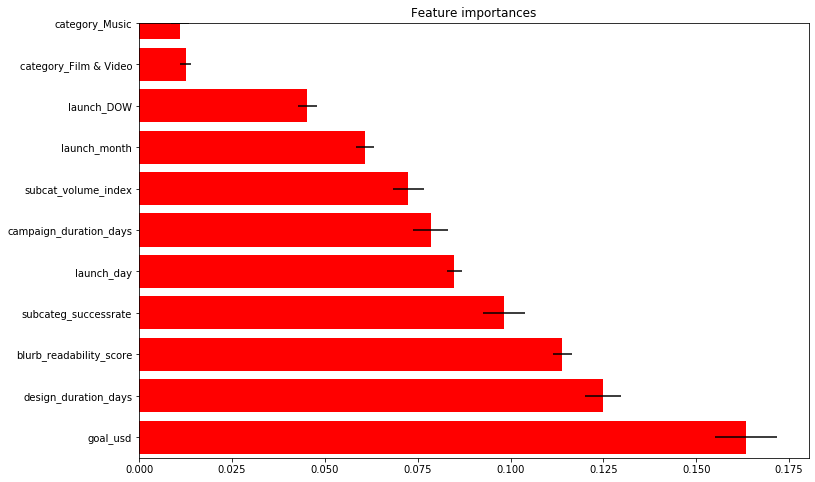

In [125]:
importances = ks_dt.feature_importances_
std = np.std([tree.feature_importances_ for tree in ks_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize = (12,8))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X_train.shape[1]), [X_cols[i+1] for i in indices])
plt.ylim([-0.5, 10])

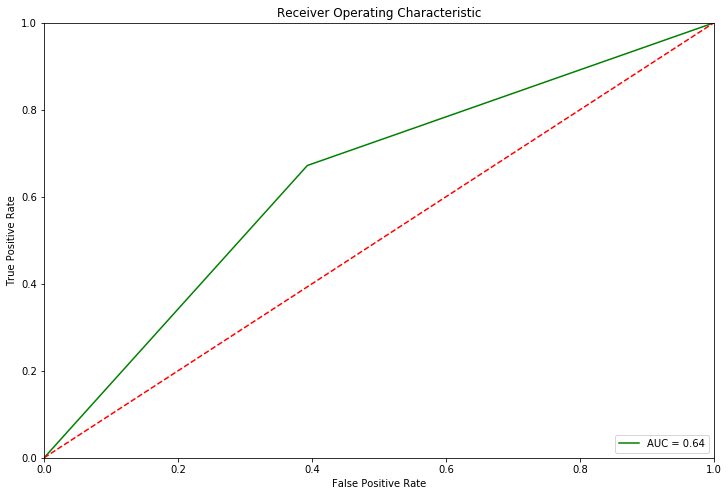

In [118]:
# ROC chars
probs = ks_dt.predict_proba(X_test)
pred = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_observed, pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (12,8))
plt.title('Receiver Operating Characteristic');
plt.plot(fpr, tpr, 'b', color = 'green',label = 'AUC = %0.2f' % roc_auc);
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest

In [119]:
from sklearn.ensemble import RandomForestClassifier

ks_rf = RandomForestClassifier(n_estimators=100)

ks_rf.fit(X_train, y_train)
ks_rf

C:\Users\sthal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

optimum probability is:  [0.5]


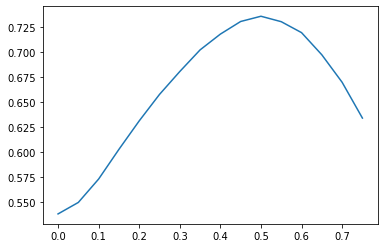

In [10]:
pred_val = ks_rf.predict_proba(X_val)
y_val_observed = y_val.reshape((y_val.shape[0],1))

from sklearn import metrics
from sklearn.metrics import accuracy_score

val_predprob = pred_val[:,1].reshape((y_val.shape[0],1))

prob_array = np.around(np.arange(0,0.8,0.05), decimals=2)
accscore_array = np.zeros(prob_array.size)
i=0
for p in prob_array:
    y_predicted = (val_predprob >= p)*1
    accscore_array[i] = metrics.accuracy_score(y_val_observed,y_predicted)
    i=i+1

plt.plot(prob_array,accscore_array);

print('optimum probability is: ',prob_array[accscore_array == np.max(accscore_array)])

In [121]:
# Predict on test using 0.5 prob

pred_test = ks_rf.predict(X_test)
y_test_observed = y_test.reshape((y_test.shape[0],1))

print('test accuracy: ',metrics.accuracy_score(y_test_observed,pred_test))

pd.DataFrame(
    confusion_matrix(y_test_observed, pred_test),
    columns=['Predicted failure', 'Predicted success'],
    index=['True failure', 'True success']
)

test accuracy:  0.7324462365591398


,Predicted failure,Predicted success
True failure,11434,5613
True success,4340,15813


Feature ranking:
1. feature 5 (0.147724)
2. feature 0 (0.117958)
3. feature 45 (0.104082)
4. feature 6 (0.100375)
5. feature 1 (0.086288)
6. feature 2 (0.083398)
7. feature 44 (0.080838)
8. feature 3 (0.067495)
9. feature 4 (0.050615)
10. feature 14 (0.014487)
11. feature 20 (0.011607)
12. feature 17 (0.010508)
13. feature 43 (0.010195)
14. feature 8 (0.008508)
15. feature 13 (0.008022)
16. feature 18 (0.007592)
17. feature 16 (0.007564)
18. feature 9 (0.007318)
19. feature 31 (0.006944)
20. feature 19 (0.006563)
21. feature 7 (0.006540)
22. feature 15 (0.005949)
23. feature 12 (0.005143)
24. feature 25 (0.004755)
25. feature 21 (0.004360)
26. feature 11 (0.004314)
27. feature 10 (0.004287)
28. feature 23 (0.003116)
29. feature 34 (0.002673)
30. feature 37 (0.002662)
31. feature 27 (0.002557)
32. feature 30 (0.002316)
33. feature 29 (0.001890)
34. feature 38 (0.001707)
35. feature 41 (0.001445)
36. feature 32 (0.001226)
37. feature 28 (0.001081)
38. feature 40 (0.001011)
39. feature 33

(-0.5, 10)

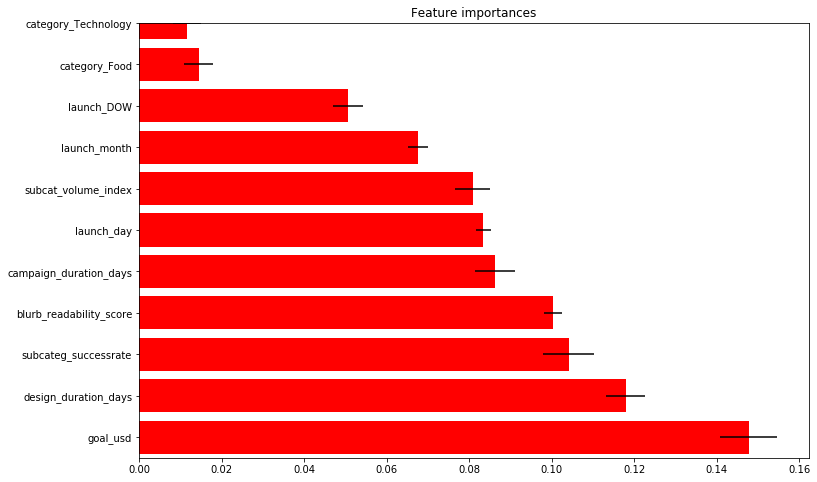

In [102]:
importances = ks_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in ks_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize = (12,8))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X_train.shape[1]), [X_cols[i] for i in indices])
plt.ylim([-0.5, 10])

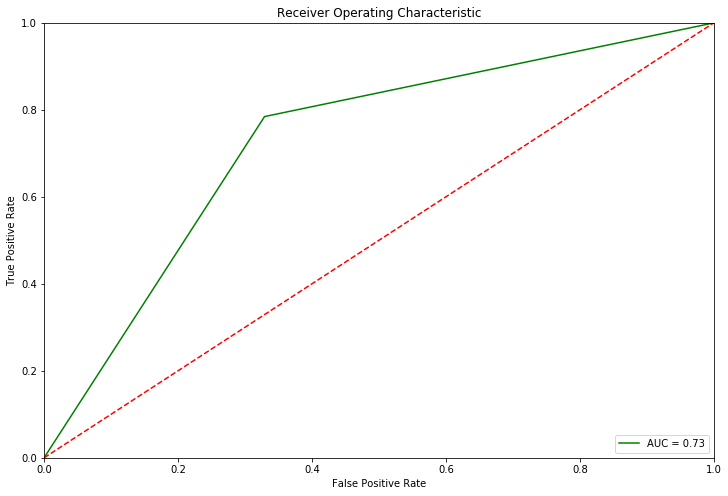

In [122]:
# ROC chars
probs = ks_rf.predict_proba(X_test)
pred = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_observed, pred_test)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (12,8))
plt.title('Receiver Operating Characteristic');
plt.plot(fpr, tpr, 'b', color = 'green',label = 'AUC = %0.2f' % roc_auc);
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()